# Frost diagrams

Import the module:

In [1]:
from electrochemistry.electrochemistry import Electrochemistry

Initiate a `Electrochemistry` object passing an element symbol. 

Available elements: {'Ag', 'Al', 'As', 'Bi', 'Br', 'C', 'Cl', 'Co', 'Cr', 'Cu', 'Fe', 'Ge', 'I', 'In', 'Mn', 'Mo', 'N', 'Ni', 'O', 'P', 'Pd', 'Re', 'S', 'Sb', 'Se', 'Si', 'Te', 'Ti', 'Tl', V', 'W', 'Xe'}

In [2]:
cr = Electrochemistry('Cr')

By default, Frost diagrams for the element at standard conditions are plotted:

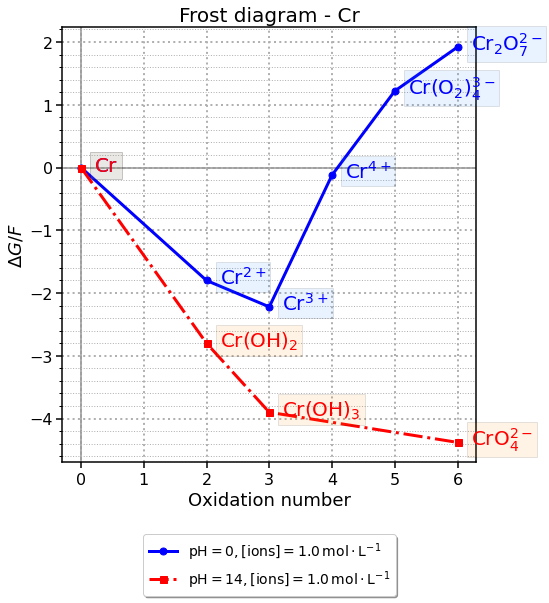

In [3]:
cr.plot_frost()

The chemical species labels can be turned off:

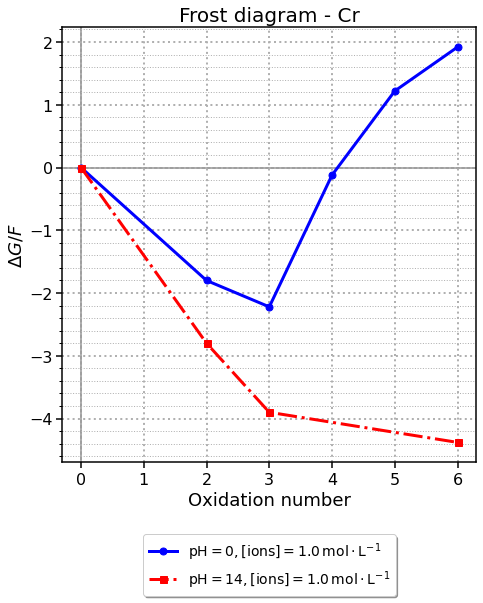

In [4]:
cr.plot_frost(chemical_labels=False)

To plot a non standard condition, turn off `plot_standards` and pass values to pH and/or species concentrations and/or temperature. The standard curve for the element on acid or basic solution will also be shown depending on the pH value:

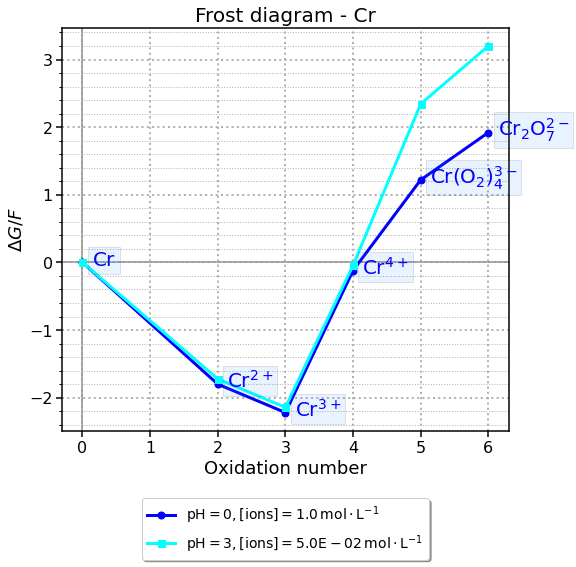

In [5]:
cr.plot_frost(plot_standards=False, pH=3, conc_ion=0.05)

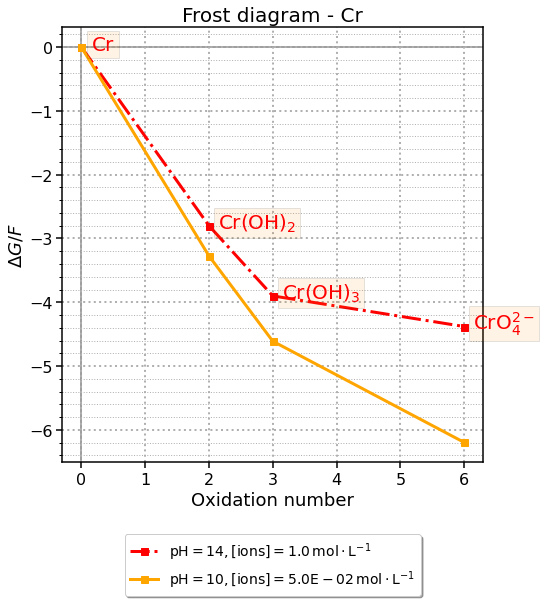

In [6]:
cr.plot_frost(plot_standards=False, pH=10, conc_ion=0.05)

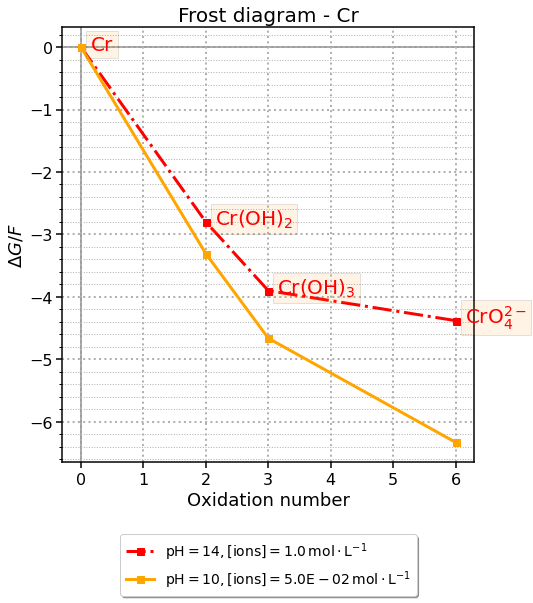

In [7]:
cr.plot_frost(plot_standards=False, pH=10, conc_ion=0.05, temperature=320)

# Interactive diagrams

An interactive online version can be accessed via Google Colab: 

The following must be imported for interactive plots:

In [8]:
import ipywidgets
from ipywidgets import interact, interactive, fixed
import matplotlib.pyplot as plt
import gc

Run the following cell to choose a chemical element:

In [9]:
element = ipywidgets.ToggleButtons(
    options=['Ag', 'Al', 'As', 'Bi', 'Br', 'C', 'Cl', 'Co', 'Cr', 'Cu', 'Fe', 'Ge', 'I', 'In', 'Mn', 'Mo', 'N', 'Ni', 'O', 'P', 'Pd', 'Re', 'S', 'Sb', 'Se', 'Si', 'Te', 'Ti', 'Tl', 'V', 'W', 'Xe'],
    description='Element: ',
    disabled=False,
    button_style='')

display(element)

ToggleButtons(description='Element: ', options=('Ag', 'Al', 'As', 'Bi', 'Br', 'C', 'Cl', 'Co', 'Cr', 'Cu', 'Fe…

Run the cell bellow to choose the solution (acid or basic):

In [10]:
solution = ipywidgets.ToggleButtons(
    options=['acid', 'basic'],
    description='Solution: ',
    disabled=False,
    button_style='')

display(solution)

ToggleButtons(description='Solution: ', options=('acid', 'basic'), value='acid')

Finally, run the cell below to interact with a Frost diagram for the chosen element in which you can change the pH and the concentration of ionic or gaseous species:

In [13]:
c = ipywidgets.FloatLogSlider(
    value=1,
    base=10,
    min=-14, # max exponent of base
    max=0, # min exponent of base
    step=1, # exponent step
    description='[species]',
    disabled=False,
    continuous_update=False,
    readout_format='.1e'
)

label_toggle = ipywidgets.Checkbox(
    value=False,
    description='Label',
    disabled=False
)

if solution.value == 'acid':
    default_value = 0
    min_value = 0
    max_value = 7
    

if solution.value == 'basic':
    default_value = 14
    min_value = 7.5
    max_value = 14


pH = ipywidgets.FloatSlider(
    value=default_value,
    min=min_value,
    max=max_value,
    step=0.5,
    description='pH:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',)    

instance = Electrochemistry(element.value)

def plot_interactive(pH=0, conc_ion=1, temperature=298.15, labels=True):        
    fig, arr = plt.subplots(nrows=1, ncols=1, figsize=(14,8), constrained_layout=True, facecolor=(1,1,1));    
    instance.plot_frost(ax=arr, plot_standards=False, pH=pH, conc_ion=conc_ion, temperature=temperature, chemical_labels=labels)
    gc.collect()


graph = interactive(plot_interactive,                    
                    pH=pH,
                    conc_ion=c,
                    temperature=fixed(298),
                    chemical_labels=label_toggle)
display(graph)
gc.collect();

interactive(children=(FloatSlider(value=14.0, continuous_update=False, description='pH:', max=14.0, min=7.5, r…